![imagen](https://cdn.foodbeast.com/content/wp-content/uploads/2012/03/beer-print-01-selectism.jpg)

# Ejercicio pandas estadística
Para este ejercicio se ha utilizado [un dataset de un concurso de kaggle](https://www.kaggle.com/nickhould/craft-cans), cuyo reto consiste en predecir el tipo de cerveza en función de sus características (nivel de alcohol, amargura, tamaño...).

# Ejercicio 1
Importa las librerias que consideres

In [3]:
import numpy as np
import pandas as pd

## Ejercicio 2
1. Importa el dataset "datasets_beer.csv"
2. Imprime por pantalla los primeros registros.
3. ¿Cuáles son sus columnas?
4. ¿Qué dimensiones tiene el DataFrame?

In [4]:
df_beer = pd.read_csv("./data/datasets_beers.csv")
df_beer

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...,...
2405,2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2406,2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2408,2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


In [5]:
df_beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2410 non-null   int64  
 1   abv         2348 non-null   float64
 2   ibu         1405 non-null   float64
 3   id          2410 non-null   int64  
 4   name        2410 non-null   object 
 5   style       2405 non-null   object 
 6   brewery_id  2410 non-null   int64  
 7   ounces      2410 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 150.8+ KB


In [6]:
df_beer.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


## Ejercicio 3
[Elimina la columna "Unnamed: 0"](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [7]:
df_beer.drop(columns = 'Unnamed: 0', inplace = True)
df_beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   abv         2348 non-null   float64
 1   ibu         1405 non-null   float64
 2   id          2410 non-null   int64  
 3   name        2410 non-null   object 
 4   style       2405 non-null   object 
 5   brewery_id  2410 non-null   int64  
 6   ounces      2410 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 131.9+ KB


In [8]:
df_beer.columns

Index(['abv', 'ibu', 'id', 'name', 'style', 'brewery_id', 'ounces'], dtype='object')

## Ejercicio 4
¿Cuántas filas y columnas tiene el dataset?

In [9]:
df_beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   abv         2348 non-null   float64
 1   ibu         1405 non-null   float64
 2   id          2410 non-null   int64  
 3   name        2410 non-null   object 
 4   style       2405 non-null   object 
 5   brewery_id  2410 non-null   int64  
 6   ounces      2410 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 131.9+ KB


In [10]:
df_beer.columns.shape[0]        # número de columnas

7

In [11]:
df_beer.shape[0]        # numero de filas

2410

## Ejercicio 5
¿De qué tipo son los datos?

In [12]:
df_beer.dtypes

abv           float64
ibu           float64
id              int64
name           object
style          object
brewery_id      int64
ounces        float64
dtype: object

## Ejercicio 6
Obtén en un nuevo DataFrame un resumen con las principales estadísticas de las columnas numéricas: mean, max, count, cuartiles...

In [13]:
info_numericas = df_beer.describe()
info_numericas

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,808.250000,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


## Ejercicio 7
¿Cuántas birras hay de cada estilo en este dataset? [Investiga en la documentación de Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) si puedes hacer un conteo de valores.

In [14]:
df_beer.head(15)

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0
6,0.045,NaN,2260,Lake Street Express,American Pale Ale (APA),177,12.0
7,0.065,NaN,2259,Foreman,American Porter,177,12.0
8,0.055,NaN,2258,Jade,American Pale Ale (APA),177,12.0
9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0


In [71]:
df_beer['style'].value_counts()

style
American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
                                 ... 
Wheat Ale                           1
Grisette                            1
Flanders Oud Bruin                  1
Braggot                             1
Low Alcohol Beer                    1
Name: count, Length: 99, dtype: int64

In [16]:
df_beer['style'].value_counts().head(10)

style
American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
American Pale Wheat Ale            97
American Brown Ale                 70
American Porter                    68
Saison / Farmhouse Ale             52
Witbier                            51
Name: count, dtype: int64

## Ejercicio 8
1. Imprime por pantalla los registros desde el décimo hasta el vigésimo
2. De esos registros, imprime por pantalla desde la columna `name` a `ounces`, ambas incluidas
3. Quédate con las columnas `abv`, `ibu` y `ounces`, y además quédate sólo con los registros 10 al 20.
4. Convierte el resultado del apartado 3 en un array de `numpy`

In [17]:
df9_19 = df_beer.iloc[9:19]

In [18]:
df_ej8 = df9_19.loc[:,'name':'ounces']
df_ej8

,name,style,brewery_id,ounces
9,Cone Crusher,American Double / Imperial IPA,177,12.0
10,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,Troll Destroyer,Belgian IPA,177,12.0
14,Bitter Bitch,American Pale Ale (APA),177,12.0
15,Ginja Ninja,Cider,154,12.0
16,Cherried Away,Cider,154,12.0
17,Rhubarbarian,Cider,154,12.0
18,BrightCider,Cider,154,12.0


In [19]:
df_nuevo = df9_19[['abv','ibu','ounces']]

In [20]:
numpy_array = df_nuevo.to_numpy()
numpy_array

array([[ 0.086,    nan, 12.   ],
       [ 0.072,    nan, 12.   ],
       [ 0.073,    nan, 12.   ],
       [ 0.069,    nan, 12.   ],
       [ 0.085,    nan, 12.   ],
       [ 0.061, 60.   , 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ]])

## Ejercicio 9
¿Cuántas onzas pesan todas las birras del dataset?

In [21]:
df_beer.head(10)

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0
6,0.045,NaN,2260,Lake Street Express,American Pale Ale (APA),177,12.0
7,0.065,NaN,2259,Foreman,American Porter,177,12.0
8,0.055,NaN,2258,Jade,American Pale Ale (APA),177,12.0
9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0


In [22]:
df_beer['ounces'].sum()

np.float64(32757.3)

In [23]:
df_beer.ounces.sum()

np.float64(32757.3)

## Ejercicio 10
El amargor de las cervezas se mide por su nivel de IBUs.
1. ¿Cuál es el amargor medio de las cervezas?
2. ¿El máximo? ¿Y el mínimo?
3. ¿Qué cerveza es la que tiene el amargor máximo? ¿Cuál es la de amargor mínimo?

In [24]:
df_beer.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [25]:
df_beer['ibu'].mean()

np.float64(42.71316725978647)

In [26]:
df_beer['ibu'].describe()       # De esta manera obtienes varios datos estadísticos incluyendo el máximo y el mínimo

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: ibu, dtype: float64

In [27]:
#Tambien los puedes obtener así:
print(f"Amargor máximo: {df_beer['ibu'].max()}\n Amargor mínimo: {df_beer['ibu'].min()}")

Amargor máximo: 138.0
 Amargor mínimo: 4.0


In [28]:
# Obtener nombre de la cerveza más amarga. Opción1
df_beer[df_beer['ibu'] == df_beer['ibu'].max()][['name', 'ibu']]

,name,ibu
147,Bitter Bitch Imperial IPA,138.0


In [29]:
# Opcion 2
df_beer.sort_values(by = 'ibu', ascending = False)[['ibu', 'name']]

,ibu,name
147,138.0,Bitter Bitch Imperial IPA
2390,135.0,Troopers Alley IPA
525,130.0,Dead-Eye DIPA
594,126.0,Bay of Bengal Double IPA (2014)
2145,120.0,Heady Topper
...,...,...
2403,NaN,Wynkoop Pumpkin Ale
2404,NaN,Rocky Mountain Oyster Stout
2406,NaN,Rail Yard Ale
2407,NaN,B3K Black Lager


In [30]:
# Obtener nombre de la cerveza menos amarga. Opción1
df_beer[df_beer['ibu'] == df_beer['ibu'].min()][['name', 'ibu']]

,name,ibu
106,Summer Solstice,4.0
112,Summer Solstice Cerveza Crema (2009),4.0
117,Summer Solstice (2011),4.0


In [31]:
# Opcion 2
df_beer.sort_values(by = 'ibu')[['ibu', 'name']]

,ibu,name
106,4.0,Summer Solstice
112,4.0,Summer Solstice Cerveza Crema (2009)
117,4.0,Summer Solstice (2011)
2339,5.0,Westbrook Gose
961,5.0,Chickawawa Lemonale
...,...,...
2403,NaN,Wynkoop Pumpkin Ale
2404,NaN,Rocky Mountain Oyster Stout
2406,NaN,Rail Yard Ale
2407,NaN,B3K Black Lager


## Ejercicio 11
No queda muy claro cuánto de dispar, de dispersa, es la medida de IBU. Mediante estadística descriptiva (una o dos métricas, sin gráficas), razona la dispersión de la variable IBU.

In [32]:
df_beer['ibu'].describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: ibu, dtype: float64

In [72]:
df_beer['ibu'].std() / df_beer['ibu'].mean()        # la desviacion estandar es un 60% de la media

np.float64(0.6076361828520853)

## Ejercicio 12
¿Existe alguna relación lineal entre las variables numéricas del dataset? Intenta pintar este razonamiento mediante un gráfico

In [33]:
df_beer.head(20)

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0
6,0.045,NaN,2260,Lake Street Express,American Pale Ale (APA),177,12.0
7,0.065,NaN,2259,Foreman,American Porter,177,12.0
8,0.055,NaN,2258,Jade,American Pale Ale (APA),177,12.0
9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0


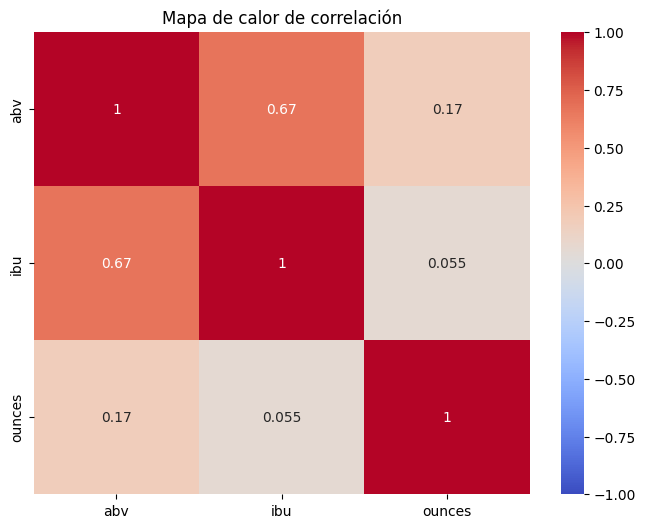

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculando la correlación
corr = df_beer[['abv', 'ibu', 'ounces']].corr()

# Creando un mapa de calor de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Mapa de calor de correlación')
plt.show()

## Ejercicio 13
Representa el nivel de alcohol (columna `abv`) en un histograma. ¿Se trata de una distribución simétrica o asimétrica?

In [34]:
import matplotlib.pyplot as plt

(array([  1.,   0.,   0.,   0.,   6.,  32., 202., 497., 559., 298., 344.,
        142., 108.,  51.,  60.,  44.,   1.,   0.,   1.,   2.]),
 array([0.001  , 0.00735, 0.0137 , 0.02005, 0.0264 , 0.03275, 0.0391 ,
        0.04545, 0.0518 , 0.05815, 0.0645 , 0.07085, 0.0772 , 0.08355,
        0.0899 , 0.09625, 0.1026 , 0.10895, 0.1153 , 0.12165, 0.128  ]),
 <BarContainer object of 20 artists>)

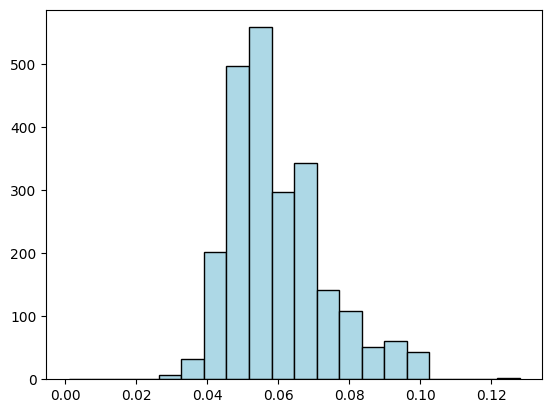

In [78]:
plt.hist(df_beer.abv, bins = 20, color = 'lightblue', edgecolor = 'black')

In [36]:
# !pip install scipy

## Ejercicio 14
Representa mediante un *boxplot* de `seaborn` la variable `abv`

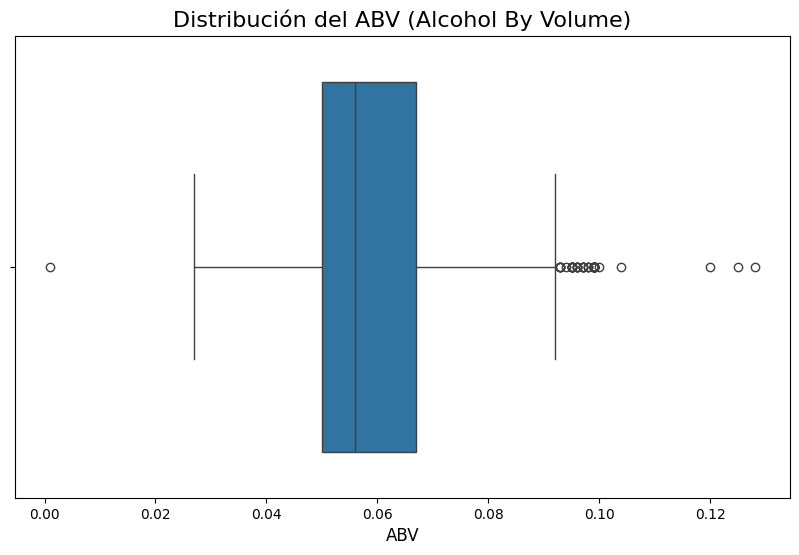

In [81]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='abv', data=df_beer)

# Personalizar el gráfico
plt.title('Distribución del ABV (Alcohol By Volume)', fontsize=16)
plt.xlabel('ABV', fontsize=12)
plt.tick_params(axis='x', labelsize=10)

# Mostrar el gráfico
plt.show()

## Ejercicio 15
1. ¿Qué estilos son los que tienen en media más alcohol?
2. ¿Y los estilos que son en media más amargos?

In [37]:
df_beer.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [38]:
df_beer['style'].unique()

array(['American Pale Lager', 'American Pale Ale (APA)', 'American IPA',
       'American Double / Imperial IPA', 'Oatmeal Stout',
       'American Porter', 'Saison / Farmhouse Ale', 'Belgian IPA',
       'Cider', 'Baltic Porter', 'Tripel', 'American Barleywine',
       'Winter Warmer', 'American Stout', 'Fruit / Vegetable Beer',
       'English Strong Ale', 'American Black Ale', 'Belgian Dark Ale',
       'American Blonde Ale', 'American Amber / Red Ale',
       'Berliner Weissbier', 'American Brown Ale',
       'American Pale Wheat Ale', 'Belgian Strong Dark Ale', 'Kölsch',
       'English Pale Ale', 'American Amber / Red Lager',
       'English Barleywine', 'Milk / Sweet Stout', 'German Pilsener',
       'Pumpkin Ale', 'Belgian Pale Ale', 'American Pilsner',
       'American Wild Ale', 'English Brown Ale', 'Altbier',
       'California Common / Steam Beer', 'Gose', 'Cream Ale',
       'Vienna Lager', 'Witbier', 'American Double / Imperial Stout',
       'Munich Helles Lager', 'Schwa

In [82]:
# Estilos con más alcohol de media:
abv_per_style = df_beer.groupby('style')['abv'].mean().sort_values(ascending = False).head(10)
abv_per_style

style
English Barleywine                  0.107667
Quadrupel (Quad)                    0.104000
American Barleywine                 0.099000
American Malt Liquor                0.099000
Russian Imperial Stout              0.097636
American Double / Imperial Stout    0.093667
American Double / Imperial IPA      0.087369
Tripel                              0.086818
Baltic Porter                       0.085167
Belgian Strong Pale Ale             0.084000
Name: abv, dtype: float64

In [83]:
# Estilos con más ibu de media:
ibu_per_style = df_beer.groupby('style')['ibu'].mean().sort_values(ascending = False).head(10)
ibu_per_style

style
American Barleywine                   96.000000
American Double / Imperial IPA        93.320000
Russian Imperial Stout                86.500000
American Double / Imperial Pilsner    85.000000
Belgian Strong Dark Ale               72.000000
American Black Ale                    68.900000
American IPA                          67.634551
English Barleywine                    66.666667
English Stout                         66.000000
American Strong Ale                   65.416667
Name: ibu, dtype: float64

In [41]:
# Eliminando los nan quedaría:
df_beers2 = df_beer.dropna(subset = ['ibu'])
df_beers2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1405 entries, 14 to 2408
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   abv         1405 non-null   float64
 1   ibu         1405 non-null   float64
 2   id          1405 non-null   int64  
 3   name        1405 non-null   object 
 4   style       1403 non-null   object 
 5   brewery_id  1405 non-null   int64  
 6   ounces      1405 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 87.8+ KB


In [42]:
df_beers2.groupby('style')['ibu'].mean().sort_values(ascending = False)

style
American Barleywine                   96.000000
American Double / Imperial IPA        93.320000
Russian Imperial Stout                86.500000
American Double / Imperial Pilsner    85.000000
Belgian Strong Dark Ale               72.000000
                                        ...    
Fruit / Vegetable Beer                14.200000
Light Lager                           11.666667
American Adjunct Lager                11.000000
Gose                                   9.428571
Berliner Weissbier                     7.800000
Name: ibu, Length: 90, dtype: float64

## Ejercicio 16
Carga el datasets de cervecerias `datasets_breweries.csv`

In [43]:
df_cervecerias = pd.read_csv('./data/datasets_breweries.csv')

In [44]:
df_cervecerias.head(15)

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
5,5,COAST Brewing Company,Charleston,SC
6,6,Great Divide Brewing Company,Denver,CO
7,7,Tapistry Brewing,Bridgman,MI
8,8,Big Lake Brewing,Holland,MI
9,9,The Mitten Brewing Company,Grand Rapids,MI


In [45]:
df_cervecerias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  558 non-null    int64 
 1   name        558 non-null    object
 2   city        558 non-null    object
 3   state       558 non-null    object
dtypes: int64(1), object(3)
memory usage: 17.6+ KB


## Ejercicio 17
1. Renombra la columna `Unnamed: 0` como `brewery_id`
2. Renombra también la columna `name` por `brewery_name`. ¿Puedes hacer ambos apartados en una sola sentencia?

In [46]:
df_cervecerias.rename(columns = {'Unnamed: 0' : 'brewery_id',
                                 'name': 'brewery_name'}, inplace = True)
df_cervecerias

,brewery_id,brewery_name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA
554,554,Dave's Brewfarm,Wilson,WI
555,555,Ukiah Brewing Company,Ukiah,CA
556,556,Butternuts Beer and Ale,Garrattsville,NY


## Ejercicio 18
Junta los dos datasets que tienes

In [47]:
df_beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   abv         2348 non-null   float64
 1   ibu         1405 non-null   float64
 2   id          2410 non-null   int64  
 3   name        2410 non-null   object 
 4   style       2405 non-null   object 
 5   brewery_id  2410 non-null   int64  
 6   ounces      2410 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 131.9+ KB


In [48]:
df_cervecerias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brewery_id    558 non-null    int64 
 1   brewery_name  558 non-null    object
 2   city          558 non-null    object
 3   state         558 non-null    object
dtypes: int64(1), object(3)
memory usage: 17.6+ KB


In [49]:
df = pd.merge(df_cervecerias, df_beer, on = 'brewery_id', how = 'outer')
df

,brewery_id,brewery_name,city,state,abv,ibu,id,name,style,ounces
0,0,NorthGate Brewing,Minneapolis,MN,0.045,50.0,2692,Get Together,American IPA,16.0
1,0,NorthGate Brewing,Minneapolis,MN,0.049,26.0,2691,Maggie's Leap,Milk / Sweet Stout,16.0
2,0,NorthGate Brewing,Minneapolis,MN,0.048,19.0,2690,Wall's End,English Brown Ale,16.0
3,0,NorthGate Brewing,Minneapolis,MN,0.060,38.0,2689,Pumpion,Pumpkin Ale,16.0
4,0,NorthGate Brewing,Minneapolis,MN,0.060,25.0,2688,Stronghold,American Porter,16.0
...,...,...,...,...,...,...,...,...,...,...
2405,556,Butternuts Beer and Ale,Garrattsville,NY,0.049,NaN,52,Heinnieweisse Weissebier,Hefeweizen,12.0
2406,556,Butternuts Beer and Ale,Garrattsville,NY,0.068,NaN,51,Snapperhead IPA,American IPA,12.0
2407,556,Butternuts Beer and Ale,Garrattsville,NY,0.049,NaN,50,Moo Thunder Stout,Milk / Sweet Stout,12.0
2408,556,Butternuts Beer and Ale,Garrattsville,NY,0.043,NaN,49,Porkslap Pale Ale,American Pale Ale (APA),12.0


## Ejercicio 19
1. ¿Cuántos estados diferentes hay?
2. ¿Y ciudades diferentes?
3. ¿Cuántas cervecerías hay?

In [50]:
states_list = df['state'].unique()
print(states_list)
print(f'Hay {len(states_list)} estados diferentes')

[' MN' ' KY' ' MA' ' CA' ' SC' ' CO' ' MI' ' IN' ' TX' ' AZ' ' MO' ' WI'
 ' IL' ' VT' ' ME' ' PA' ' KS' ' NY' ' NH' ' GA' ' VA' ' FL' ' MD' ' NC'
 ' WY' ' OR' ' RI' ' CT' ' OH' ' AK' ' MS' ' AR' ' LA' ' WV' ' UT' ' ID'
 ' WA' ' OK' ' NE' ' HI' ' IA' ' SD' ' NJ' ' MT' ' DC' ' NV' ' TN' ' NM'
 ' AL' ' DE' ' ND']
Hay 51 estados diferentes


In [51]:
df['city'].nunique()        # Num de ciudades distintas

384

In [52]:
df['brewery_name'].nunique()

551

In [53]:
df['brewery_id'].nunique()

558

## Ejercicio 20
Agrupa por estado y ciudad, la media, mediana y máximo nivel de alcohol

In [54]:
df.groupby(['state', 'city'])['abv'].agg(['mean', 'median','max'])

mean  median    max
state city                               
AK    Anchorage   0.054200  0.0520  0.063
      Juneau      0.053000  0.0530  0.053
      Soldotna    0.058500  0.0580  0.068
      Talkeetna   0.059500  0.0585  0.065
AL    Birmingham  0.065400  0.0600  0.093
...                    ...     ...    ...
WI    Wilson      0.055000  0.0550  0.055
WV    Lewisburg   0.062000  0.0620  0.067
WY    Jackson     0.054857  0.0520  0.068
      Pinedale    0.061000  0.0610  0.072
      Sheridan    0.052833  0.0480  0.070

[401 rows x 3 columns]

In [55]:
df.groupby(['state', 'city']).describe()['abv']

count      mean       std    min     25%     50%      75%  \
state city                                                                    
AK    Anchorage    15.0  0.054200  0.005557  0.048  0.0495  0.0520  0.05850   
      Juneau        2.0  0.053000  0.000000  0.053  0.0530  0.0530  0.05300   
      Soldotna      4.0  0.058500  0.007371  0.050  0.0560  0.0580  0.06050   
      Talkeetna     4.0  0.059500  0.003873  0.056  0.0575  0.0585  0.06050   
AL    Birmingham    5.0  0.065400  0.015518  0.056  0.0580  0.0600  0.06000   
...                 ...       ...       ...    ...     ...     ...      ...   
WI    Wilson        1.0  0.055000       NaN  0.055  0.0550  0.0550  0.05500   
WV    Lewisburg     2.0  0.062000  0.007071  0.057  0.0595  0.0620  0.06450   
WY    Jackson       7.0  0.054857  0.006817  0.050  0.0500  0.0520  0.05700   
      Pinedale      2.0  0.061000  0.015556  0.050  0.0555  0.0610  0.06650   
      Sheridan      6.0  0.052833  0.009725  0.046  0.0465  0.0480  0.05625   

                    max  
state city               
AK    Anchorage   0.063  
      Juneau      0.053  
      Soldotna    0.068  
      Talkeetna   0.065  
AL    Birmingham  0.093  
...                 ...  
WI    Wilson      0.055  
WV    Lewisburg   0.067  
WY    Jackson     0.068  
      Pinedale    0.072  
      Sheridan    0.070  

[401 rows x 8 columns]

## Ejercicio 21
¿Cuáles son las cervezas más amargas que se consumen en Indiana, estado = `IN`?

In [56]:
cervezas_IN = df[df['state'] == 'IN']
cervezas_IN

,brewery_id,brewery_name,city,state,abv,ibu,id,name,style,ounces


In [57]:
df['state'].unique()        # vemos que el estado no se llama 'IN' sino ' IN', no está bien limpiado el dataset

array([' MN', ' KY', ' MA', ' CA', ' SC', ' CO', ' MI', ' IN', ' TX',
       ' AZ', ' MO', ' WI', ' IL', ' VT', ' ME', ' PA', ' KS', ' NY',
       ' NH', ' GA', ' VA', ' FL', ' MD', ' NC', ' WY', ' OR', ' RI',
       ' CT', ' OH', ' AK', ' MS', ' AR', ' LA', ' WV', ' UT', ' ID',
       ' WA', ' OK', ' NE', ' HI', ' IA', ' SD', ' NJ', ' MT', ' DC',
       ' NV', ' TN', ' NM', ' AL', ' DE', ' ND'], dtype=object)

In [58]:
cervezas_IN = df[df['state'] == ' IN']
cervezas_IN

,brewery_id,brewery_name,city,state,abv,ibu,id,name,style,ounces
138,16,Flat 12 Bierwerks,Indianapolis,IN,0.065,NaN,2624,Deflator,Doppelbock,16.0
139,16,Flat 12 Bierwerks,Indianapolis,IN,0.050,27.0,2284,Hinchtown Hammer Down,American Blonde Ale,16.0
140,16,Flat 12 Bierwerks,Indianapolis,IN,0.060,104.0,1610,Half Cycle IPA,American IPA,16.0
141,17,Tin Man Brewing Company,Evansville,IN,0.058,20.0,2623,Cafe Leche,American Porter,16.0
142,17,Tin Man Brewing Company,Evansville,IN,0.052,12.0,2622,Damascene Apricot Sour,Fruit / Vegetable Beer,16.0
...,...,...,...,...,...,...,...,...,...,...
1628,315,Cutters Brewing Company,Avon,IN,0.080,NaN,1787,Floyd's Folly,Scottish Ale,16.0
1629,315,Cutters Brewing Company,Avon,IN,0.063,NaN,1786,Half Court IPA,American IPA,16.0
1727,348,Four Horsemen Brewing Company,South Bend,IN,0.040,NaN,1657,Leprechaun Lager,American Pale Lager,12.0
1754,358,Daredevil Brewing Company,Shelbyville,IN,0.072,NaN,1623,Lift Off IPA,American IPA,16.0


In [59]:
cervezas_IN.sort_values(by = 'ibu', ascending = False).head()

,brewery_id,brewery_name,city,state,abv,ibu,id,name,style,ounces
145,17,Tin Man Brewing Company,Evansville,IN,0.085,115.0,1449,Overlord Imperial IPA,American Double / Imperial IPA,16.0
166,24,Burn 'Em Brewing,Michigan City,IN,0.099,115.0,2471,Hopkick Dropkick,American Double / Imperial IPA,12.0
140,16,Flat 12 Bierwerks,Indianapolis,IN,0.060,104.0,1610,Half Cycle IPA,American IPA,16.0
203,25,Sun King Brewing Company,Indianapolis,IN,0.091,91.0,651,Isis,American Double / Imperial IPA,16.0
160,22,Four Fathers Brewing,Valparaiso,IN,0.064,90.0,2610,The Gadget,American IPA,16.0


## Ejercicio 22
Obtén una tabla con los principales estadísticos del campo `ibu`,  a nivel ciudad

In [60]:
df.groupby('city').describe()['ibu']

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Abingdon,1.0,135.000000,NaN,135.0,135.00,135.0,135.00,135.0
Abita Springs,3.0,27.333333,21.455380,13.0,15.00,17.0,34.50,52.0
Ada,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afton,4.0,43.000000,19.899749,22.0,28.00,45.0,60.00,60.0
Airway Heights,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
Woodinville,4.0,46.750000,18.643587,27.0,39.75,44.0,51.00,72.0
Worcester,1.0,69.000000,NaN,69.0,69.00,69.0,69.00,69.0
Yakima,2.0,54.000000,22.627417,38.0,46.00,54.0,62.00,70.0


## Ejercicio 23
Consigue en un DataFrame de todas las cervezas en cuyas cervecerías al menos haya una cerveza con un `abv` mínimo 0.07.

In [61]:
# todas las cervezas, que venda una cervecería, donde al menos una de ellas sea de 0.07 para arriba

In [62]:
cervecerias_gran_abv = df[df['abv'] >= 0.07]['brewery_name'].unique()  # Lista de cervecerías que venden  cervezas con ABV >= 0.07

In [63]:
df[df['brewery_name'].isin(cervecerias_gran_abv)]   # lista de todas las cervecas que se venden en las cervecerias que venden alguna cerveza con abv>=0.07

,brewery_id,brewery_name,city,state,abv,ibu,id,name,style,ounces
6,1,Against the Grain Brewery,Louisville,KY,0.080,68.0,2686,Citra Ass Down,American Double / Imperial IPA,16.0
7,1,Against the Grain Brewery,Louisville,KY,0.125,80.0,2685,London Balling,English Barleywine,16.0
8,1,Against the Grain Brewery,Louisville,KY,0.077,25.0,2684,35 K,Milk / Sweet Stout,16.0
9,1,Against the Grain Brewery,Louisville,KY,0.042,42.0,2683,A Beer,American Pale Ale (APA),16.0
10,1,Against the Grain Brewery,Louisville,KY,0.050,25.0,2682,Rules are Rules,German Pilsener,16.0
...,...,...,...,...,...,...,...,...,...,...
2347,530,Buckbean Brewing Company,Reno,NV,0.062,42.0,28,Tule Duck Red Ale (Current),American Amber / Red Ale,16.0
2348,530,Buckbean Brewing Company,Reno,NV,0.058,35.0,27,Original Orange Blossom Ale (Current),Herbed / Spiced Beer,16.0
2349,530,Buckbean Brewing Company,Reno,NV,0.052,40.0,26,Black Noddy Lager (Current),Schwarzbier,16.0
2396,550,Wind River Brewing Company,Pinedale,WY,0.072,NaN,324,Wyoming Pale Ale,American Pale Ale (APA),16.0


In [64]:
df[df['brewery_name'].isin(cervecerias_gran_abv)][['brewery_name', 'name','style']]     # Misma lista incluyendo solo las columnas cerveceria, cerveza y tipo

,brewery_name,name,style
6,Against the Grain Brewery,Citra Ass Down,American Double / Imperial IPA
7,Against the Grain Brewery,London Balling,English Barleywine
8,Against the Grain Brewery,35 K,Milk / Sweet Stout
9,Against the Grain Brewery,A Beer,American Pale Ale (APA)
10,Against the Grain Brewery,Rules are Rules,German Pilsener
...,...,...,...
2347,Buckbean Brewing Company,Tule Duck Red Ale (Current),American Amber / Red Ale
2348,Buckbean Brewing Company,Original Orange Blossom Ale (Current),Herbed / Spiced Beer
2349,Buckbean Brewing Company,Black Noddy Lager (Current),Schwarzbier
2396,Wind River Brewing Company,Wyoming Pale Ale,American Pale Ale (APA)


## Ejercicio 24
Teniendo en cuenta la media de amargor de todas las cervezas, obtén una tabla con las cervezas cuyos estados tengan una media de amargor en cerveza por encima de la media

In [65]:
# Las cervezas que se encuentran en aquellos estados, cuya media de amargor, sea superior a la media de amargor total

In [66]:
media_ibu = df['ibu'].mean()        # Primero calculamos la media  de la columna 'ibu'
media_ibu

np.float64(42.71316725978647)

In [87]:
ibu_per_state = df.groupby('state')['ibu'].mean()     # Lista de  medias de IBU por estado
ibu_per_state

state
AK    40.882353
AL    51.222222
AR    39.000000
AZ    35.208333
CA    46.281481
CO    47.431507
CT    40.833333
DC    55.250000
DE    52.000000
FL    46.756757
GA    46.285714
HI    32.666667
IA    33.200000
ID    55.117647
IL    41.461538
IN    42.989011
KS    36.684211
KY    40.714286
LA    33.000000
MA    38.000000
MD    36.800000
ME    52.857143
MI    36.736842
MN    49.956522
MO    32.482759
MS    46.454545
MT    41.695652
NC    43.300000
ND    40.333333
NE    30.666667
NH    48.500000
NJ    46.375000
NM    57.000000
NV    46.500000
NY    46.000000
OH    44.187500
OK    40.727273
OR    47.942529
PA    42.446809
RI    31.550000
SC    30.200000
SD          NaN
TN    41.600000
TX    40.393258
UT    45.545455
VA    45.371429
VT    42.294118
WA    44.976744
WI    26.547619
WV    57.500000
WY    32.083333
Name: ibu, dtype: float64

In [86]:
high_ibu_states =ibu_per_state[ibu_per_state > media_ibu]        # Lista de estados en los que el ibu medio es superior a la media del total del país
high_ibu_states.sort_values(ascending = False)

state
WV    57.500000
NM    57.000000
DC    55.250000
ID    55.117647
ME    52.857143
DE    52.000000
AL    51.222222
MN    49.956522
NH    48.500000
OR    47.942529
CO    47.431507
FL    46.756757
NV    46.500000
MS    46.454545
NJ    46.375000
GA    46.285714
CA    46.281481
NY    46.000000
UT    45.545455
VA    45.371429
WA    44.976744
OH    44.187500
NC    43.300000
IN    42.989011
Name: ibu, dtype: float64

In [69]:
df[df['state'].isin(high_ibu_states.index)][['state','name','style']]       # Lista de las cervezas que se venden en los estados con ibu medio mayor que el del país

,state,name,style
0,MN,Get Together,American IPA
1,MN,Maggie's Leap,Milk / Sweet Stout
2,MN,Wall's End,English Brown Ale
3,MN,Pumpion,Pumpkin Ale
4,MN,Stronghold,American Porter
...,...,...,...
2404,CA,Pilsner Ukiah,German Pilsener
2405,NY,Heinnieweisse Weissebier,Hefeweizen
2406,NY,Snapperhead IPA,American IPA
2407,NY,Moo Thunder Stout,Milk / Sweet Stout
